# CPSC 322: HW-3

Name: Zoe Erpelding 


Term: Fall 2023

### 1. Load data_util and data_table

In [114]:
from data_table import*
from data_util import*

### 2. Load each data set and combine them on model year and model name with non-matches

In [115]:
table1 = DataTable(["MPG", "Cyls", "Displacement", "Hrspwr", "Wght", "Accel", "Model Year", "Origin", "CarName"])
table2 = DataTable(["CarName", "Model Year", "MSRP"])

table1.load('auto-mpg.txt')
table2.load('auto-prices.txt')

comb_table = DataTable.combine(table1, table2, ["CarName", "Model Year"], True)

### 3. Print first 15 rows of combined table

In [116]:
print(comb_table.rows([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]))

MPG      Cyls    Displacement    Hrspwr    Wght    Accel    Model Year    Origin  CarName                           MSRP
-----  ------  --------------  --------  ------  -------  ------------  --------  --------------------------------  ------
18.0        8             307       130    3504     12              70         1  chevrolet chevelle malibu         2881
15.0        8             350       165    3693     11.5            70         1  buick skylark 320                 2847
18.0        8             318       150    3436     11              70         1  plymouth satellite                2831
16.0        8             304       150    3433     12              70         1  amc rebel sst
17.0        8             302       140    3449     10.5            70         1  ford torino                       2778
15.0        8             429       198    4341     10              70         1  ford galaxie 500                  3137
14.0        8             454       220    4354      9 

### 4. Print number of rows in combined table

In [117]:
print(comb_table.row_count())

331


### 5. Print duplicate instances in the combined table

In [118]:
print(duplicate_instances(comb_table))

  MPG    Cyls    Displacement    Hrspwr    Wght    Accel    Model Year    Origin  CarName         MSRP
-----  ------  --------------  --------  ------  -------  ------------  --------  ------------  ------
 19         6             232       100    2634     13              71         1  amc gremlin     1999
 18         6             250        88    3139     14.5            71         1  ford mustang    3322
 19         4             122        85    2310     18.5            73         1  ford pinto      2021
 21.5       3              80       110    2720     13.5            77         3  mazda rx-4      5470


### 6. Remove duplicated instances from the combined table 

In [119]:
comb_table = remove_duplicates(comb_table)

### 7. Print number of rows in combined table

In [120]:
print(comb_table.row_count())

327


### 8. Print the unique values of the cylinders, origin, and model year columns

In [121]:
print(distinct_values(comb_table,'Cyls'))
print(distinct_values(comb_table, 'Origin'))
print(distinct_values(comb_table, 'Model Year'))

[6, 4, 3, 8, 5, '']
[1, 3, 2, '']
[71, 73, 77, 70, 72, 74, 75, 76, 78, 79]


### 9. Check if there are any missing values in the MSRP column

In [122]:
values = distinct_values(comb_table, 'MSRP')
if '' in values:
    print("There is at least one missing value in MSRP")
else:
    print("There are no missing values in MSRP")


There is at least one missing value in MSRP


### 10. Remove the displacement, weight, horsepower, and acceleration columns from the combined table

In [123]:
comb_table.drop(['Displacement', 'Wght', 'Hrspwr', 'Accel'])

### 11. Print first 15 rows of combined table

In [124]:
print(comb_table.rows([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]))

MPG      Cyls    Model Year    Origin  CarName                    MSRP
-----  ------  ------------  --------  -------------------------  ------
19.0        6            71         1  amc gremlin                1999
18.0        6            71         1  ford mustang               3322
19.0        4            73         1  ford pinto                 2021
21.5        3            77         3  mazda rx-4                 5470
18.0        8            70         1  chevrolet chevelle malibu  2881
15.0        8            70         1  buick skylark 320          2847
18.0        8            70         1  plymouth satellite         2831
16.0        8            70         1  amc rebel sst
17.0        8            70         1  ford torino                2778
15.0        8            70         1  ford galaxie 500           3137
14.0        8            70         1  chevrolet impala           3132
14.0        8            70         1  plymouth fury iii          3174
14.0        8         

### 12. Replace the missing MSRP values using the average of similar model year and cylinder values. Show the first 15 instances of the resulting table

In [125]:
avg = lambda xs : None if not len(xs) else sum(xs) / len(xs)
comb_table = replace_missing(comb_table, 'MSRP', ['Model Year', 'Cyls'], avg)
print(comb_table.rows([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]))

MPG      Cyls    Model Year    Origin  CarName                       MSRP
-----  ------  ------------  --------  -------------------------  -------
19.0        6            71         1  amc gremlin                1999
18.0        6            71         1  ford mustang               3322
19.0        4            73         1  ford pinto                 2021
21.5        3            77         3  mazda rx-4                 5470
18.0        8            70         1  chevrolet chevelle malibu  2881
15.0        8            70         1  buick skylark 320          2847
18.0        8            70         1  plymouth satellite         2831
16.0        8            70         1  amc rebel sst              3165.94
17.0        8            70         1  ford torino                2778
15.0        8            70         1  ford galaxie 500           3137
14.0        8            70         1  chevrolet impala           3132
14.0        8            70         1  plymouth fury iii          31

### 13. Replace the missing MPG values using a similar approach. Show the first 15 instances of the resulting table.

In [126]:
comb_table = replace_missing(comb_table, 'MPG', ['Model Year', 'Cyls'], avg)
print(comb_table.rows([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]))

    MPG    Cyls    Model Year    Origin  CarName                       MSRP
-------  ------  ------------  --------  -------------------------  -------
19            6            71         1  amc gremlin                1999
18            6            71         1  ford mustang               3322
19            4            73         1  ford pinto                 2021
21.5          3            77         3  mazda rx-4                 5470
18            8            70         1  chevrolet chevelle malibu  2881
15            8            70         1  buick skylark 320          2847
18            8            70         1  plymouth satellite         2831
16            8            70         1  amc rebel sst              3165.94
17            8            70         1  ford torino                2778
15            8            70         1  ford galaxie 500           3137
14            8            70         1  chevrolet impala           3132
14            8            70         1  p

### 14. Remove all of the other instances of the table with missing values and print the final row count.

In [127]:
comb_table = remove_missing(comb_table, ['Cyls', 'Origin'])
print(comb_table.row_count())

316


### 15. Save the resulting "cleaned" table to a file called auto-clean.txt

In [128]:
comb_table.save('auto-clean.txt')

### 16. Create dot charts of MPG and MSRP values (the charts should be displayed inline in the notebook, i.e., you don't need to save them to a file)

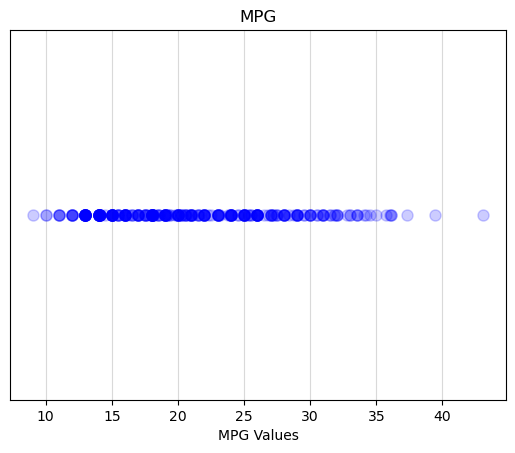

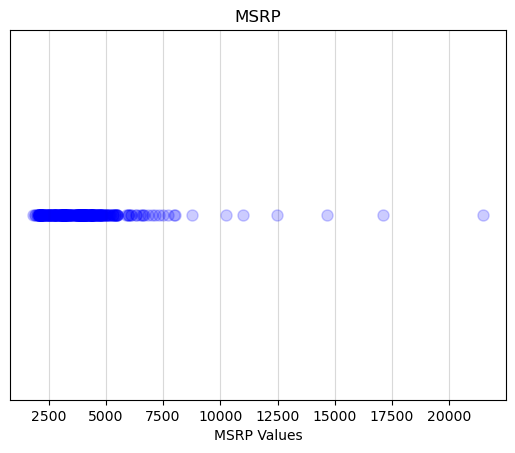

In [129]:
MPG_vals = [row['MPG'] for row in comb_table]
dot_chart(MPG_vals, 'MPG Values', 'MPG')
MSRP_vals = [row['MSRP'] for row in comb_table]
dot_chart(MSRP_vals, 'MSRP Values', 'MSRP')


### 17. Create pie and bar charts of the number of cars by cylinders, by origin, and by year. Note: this should result in six total charts - one pie chart and one bar chart for numbers of cars by cylinders, one pie chart and one bar chart for number of cars by origin, and so on.

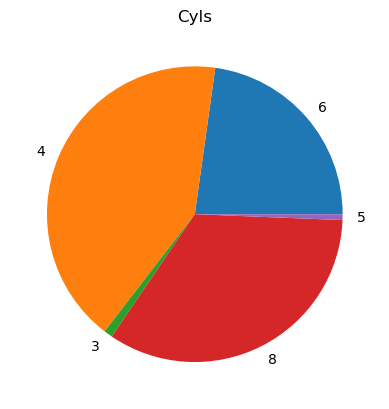

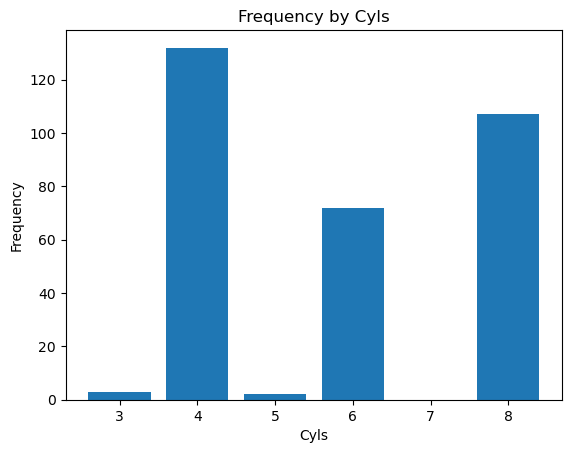

In [130]:
g1,s1 = frequencies(comb_table, 'Cyls')
pie_chart(s1,g1,'Cyls')
bar_chart(s1,g1,'Cyls', 'Frequency', 'Frequency by Cyls')

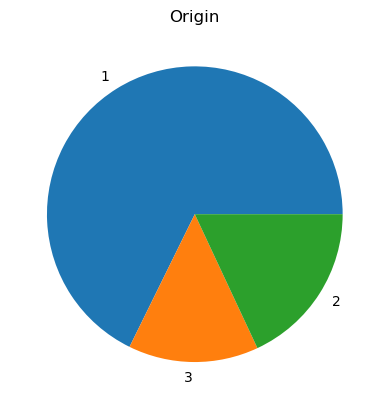

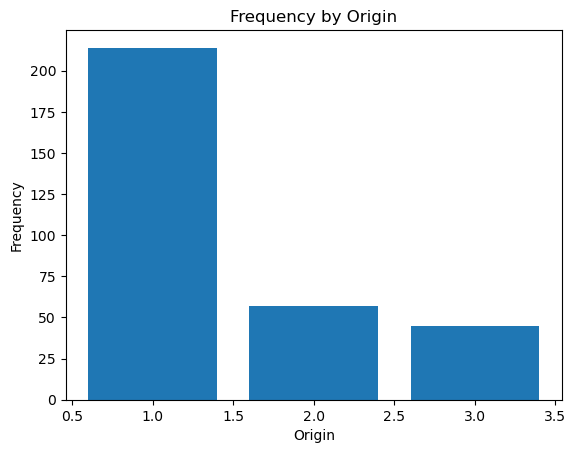

In [131]:
g2,s2 = frequencies(comb_table, 'Origin')
pie_chart(s2,g2,'Origin')
bar_chart(s2,g2,'Origin', 'Frequency', 'Frequency by Origin')

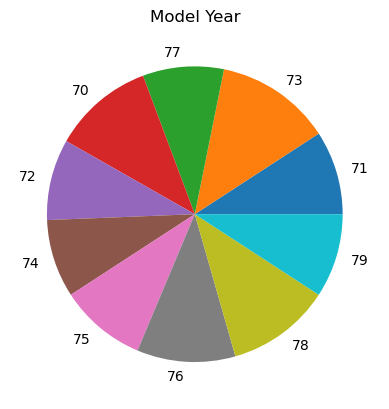

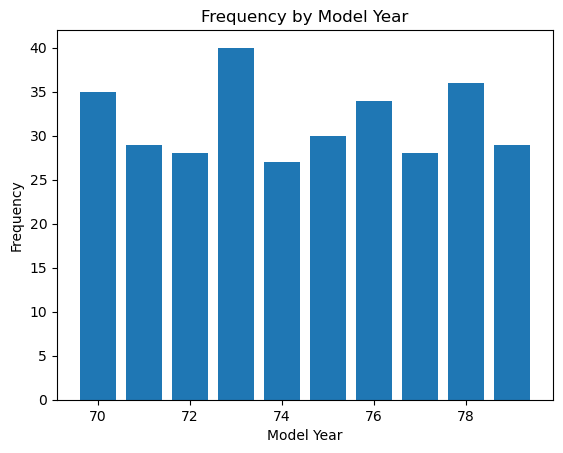

In [132]:
g3,s3 = frequencies(comb_table, 'Model Year')
pie_chart(s3,g3,'Model Year')
bar_chart(s3,g3,'Model Year', 'Frequency', 'Frequency by Model Year')

### 18. Create box and whisker plots of MPG by year, MPG by origin, and MPG by number of cylinders.

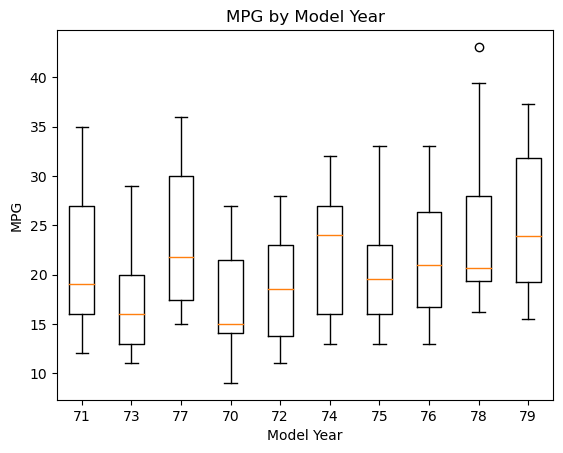

In [145]:
year_list = partition(comb_table, ['Model Year'])
MPG_year = [[row['MPG'] for row in t] for t in year_list]
Model_year = [t[0]['Model Year'] for t in year_list]
box_plot(MPG_year, Model_year, 'Model Year', 'MPG', 'MPG by Model Year')

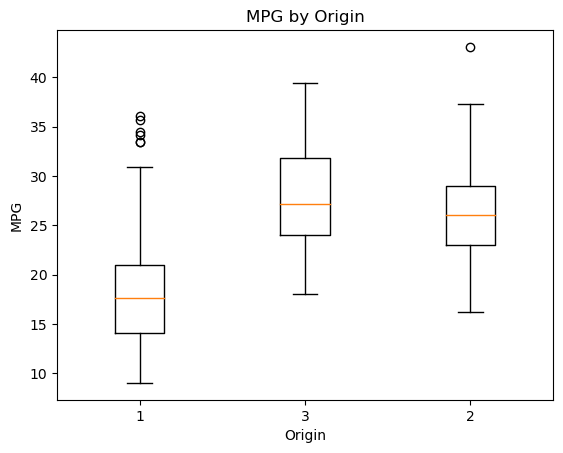

In [134]:
origin_list = partition(comb_table, ['Origin'])
MPG_origin = [[row['MPG'] for row in t] for t in origin_list]
origin = [t[0]['Origin'] for t in origin_list]
box_plot(MPG_origin, origin, 'Origin', 'MPG', 'MPG by Origin')

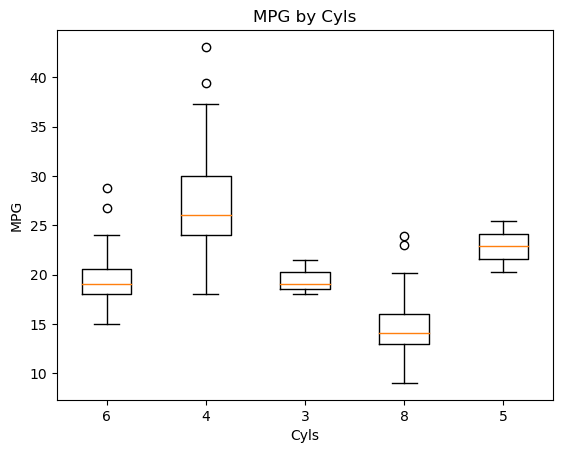

In [135]:
cyls_list = partition(comb_table, ['Cyls'])
MPG_cyls = [[row['MPG'] for row in t] for t in cyls_list]
cyls = [t[0]['Cyls'] for t in cyls_list]
box_plot(MPG_cyls, cyls, 'Cyls', 'MPG', 'MPG by Cyls')

### 19. Create a scatter plot of MSRP versus MPG, with MSRP on the x axis and MPG on the y axis.

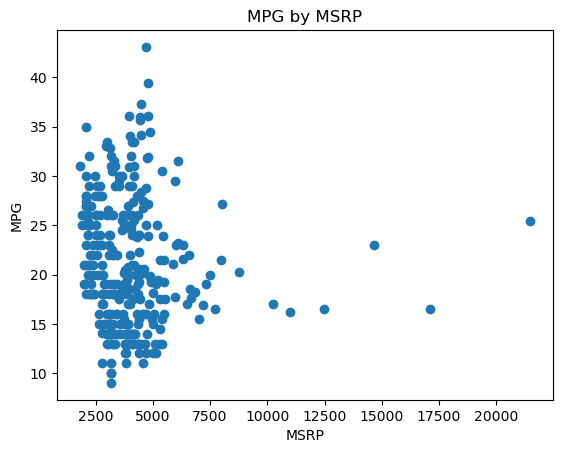

In [137]:
msrp_vals = [row['MSRP'] for row in comb_table]
mpg_vals = [row['MPG'] for row in comb_table]
scatter_plot(msrp_vals, mpg_vals, 'MSRP', 'MPG', 'MPG by MSRP')